In [1]:
import pandas as pd
import re

# 定义文件路径
file_path = '/home/xiaoxinyu/TorchFiber/_outputs/paper_txt/Final_result.txt'

# 定义列名
columns = ['Nmodes', 'Rs', 'Nch', 'Pch', 'Method', 'Value']

# 初始化一个空列表来保存数据
data = []

# 打开文件并逐行读取
with open(file_path, 'r') as file:
    for line in file:
        # 去除行末尾的换行符
        line = line.strip()
        
        # 使用正则表达式匹配并提取数据
        match = re.match(r'Nmodes=(\d+), Rs=(\d+), Nch=(\d+), Pch=(-?\d+), (.*): (-?[\d.]+|inf|-inf)', line)
        if match:
            nmodes = int(match.group(1))
            rs = int(match.group(2))
            nch = int(match.group(3))
            pch = int(match.group(4))
            method = match.group(5).strip()
            value = match.group(6)
            # 处理值为'inf'的情况
            value = float(value) if value != 'inf' else float('inf')
            
            # 将数据添加到列表
            data.append([nmodes, rs, nch, pch, method, value])
        else:
            print(line)

# 创建DataFrame
df = pd.DataFrame(data, columns=columns)

# 打印DataFrame以查看结果
print(df)

      Nmodes   Rs  Nch  Pch                               Method     Value
0          2   40    1   -3                                  CDC  8.059405
1          2   40    1   -3                           DBP stps=1  8.294577
2          2   40    1   -3                           DBP stps=2  8.316214
3          2   40    1   -3                           DBP stps=4  8.362030
4          2   40    1   -3                           DBP stps=6  8.388072
...      ...  ...  ...  ...                                  ...       ...
7633       1  160   11    4  FDBP step=25 train on Rs=160G Nch=1  7.974447
7634       1  160   11    5   FDBP step=5 train on Rs=160G Nch=1  5.803586
7635       1  160   11    5  FDBP step=25 train on Rs=160G Nch=1  6.902381
7636       1  160   11    6   FDBP step=5 train on Rs=160G Nch=1  4.304720
7637       1  160   11    6  FDBP step=25 train on Rs=160G Nch=1  5.514559

[7638 rows x 6 columns]


In [2]:
df['Method']

0                                       CDC
1                                DBP stps=1
2                                DBP stps=2
3                                DBP stps=4
4                                DBP stps=6
                       ...                 
7633    FDBP step=25 train on Rs=160G Nch=1
7634     FDBP step=5 train on Rs=160G Nch=1
7635    FDBP step=25 train on Rs=160G Nch=1
7636     FDBP step=5 train on Rs=160G Nch=1
7637    FDBP step=25 train on Rs=160G Nch=1
Name: Method, Length: 7638, dtype: object

In [4]:
import numpy as np
Qp_names = ['CDC','DBP stps=1', 'DBP stps=2', 'DBP stps=4', 'DBP stps=8', 'FDBP step=5 train on Rs=80G Nch=1', 'FDBP step=25 train on Rs=80G Nch=1'] 
Qps = {key: df[(df['Nmodes'] == 2) & (df['Rs'] == 80) & (df['Nch'] == 3) & (df['Method'] == key)] for key in Qp_names}

Qps['AMPBC'] = {'Pch': range(-3, 8), 'Value':np.load('../result/ampbc.npy')} # type: ignore
Qps['PBC'] = {'Pch': range(-3, 8), 'Value':np.load('../result/pbc.npy')} # type: ignore

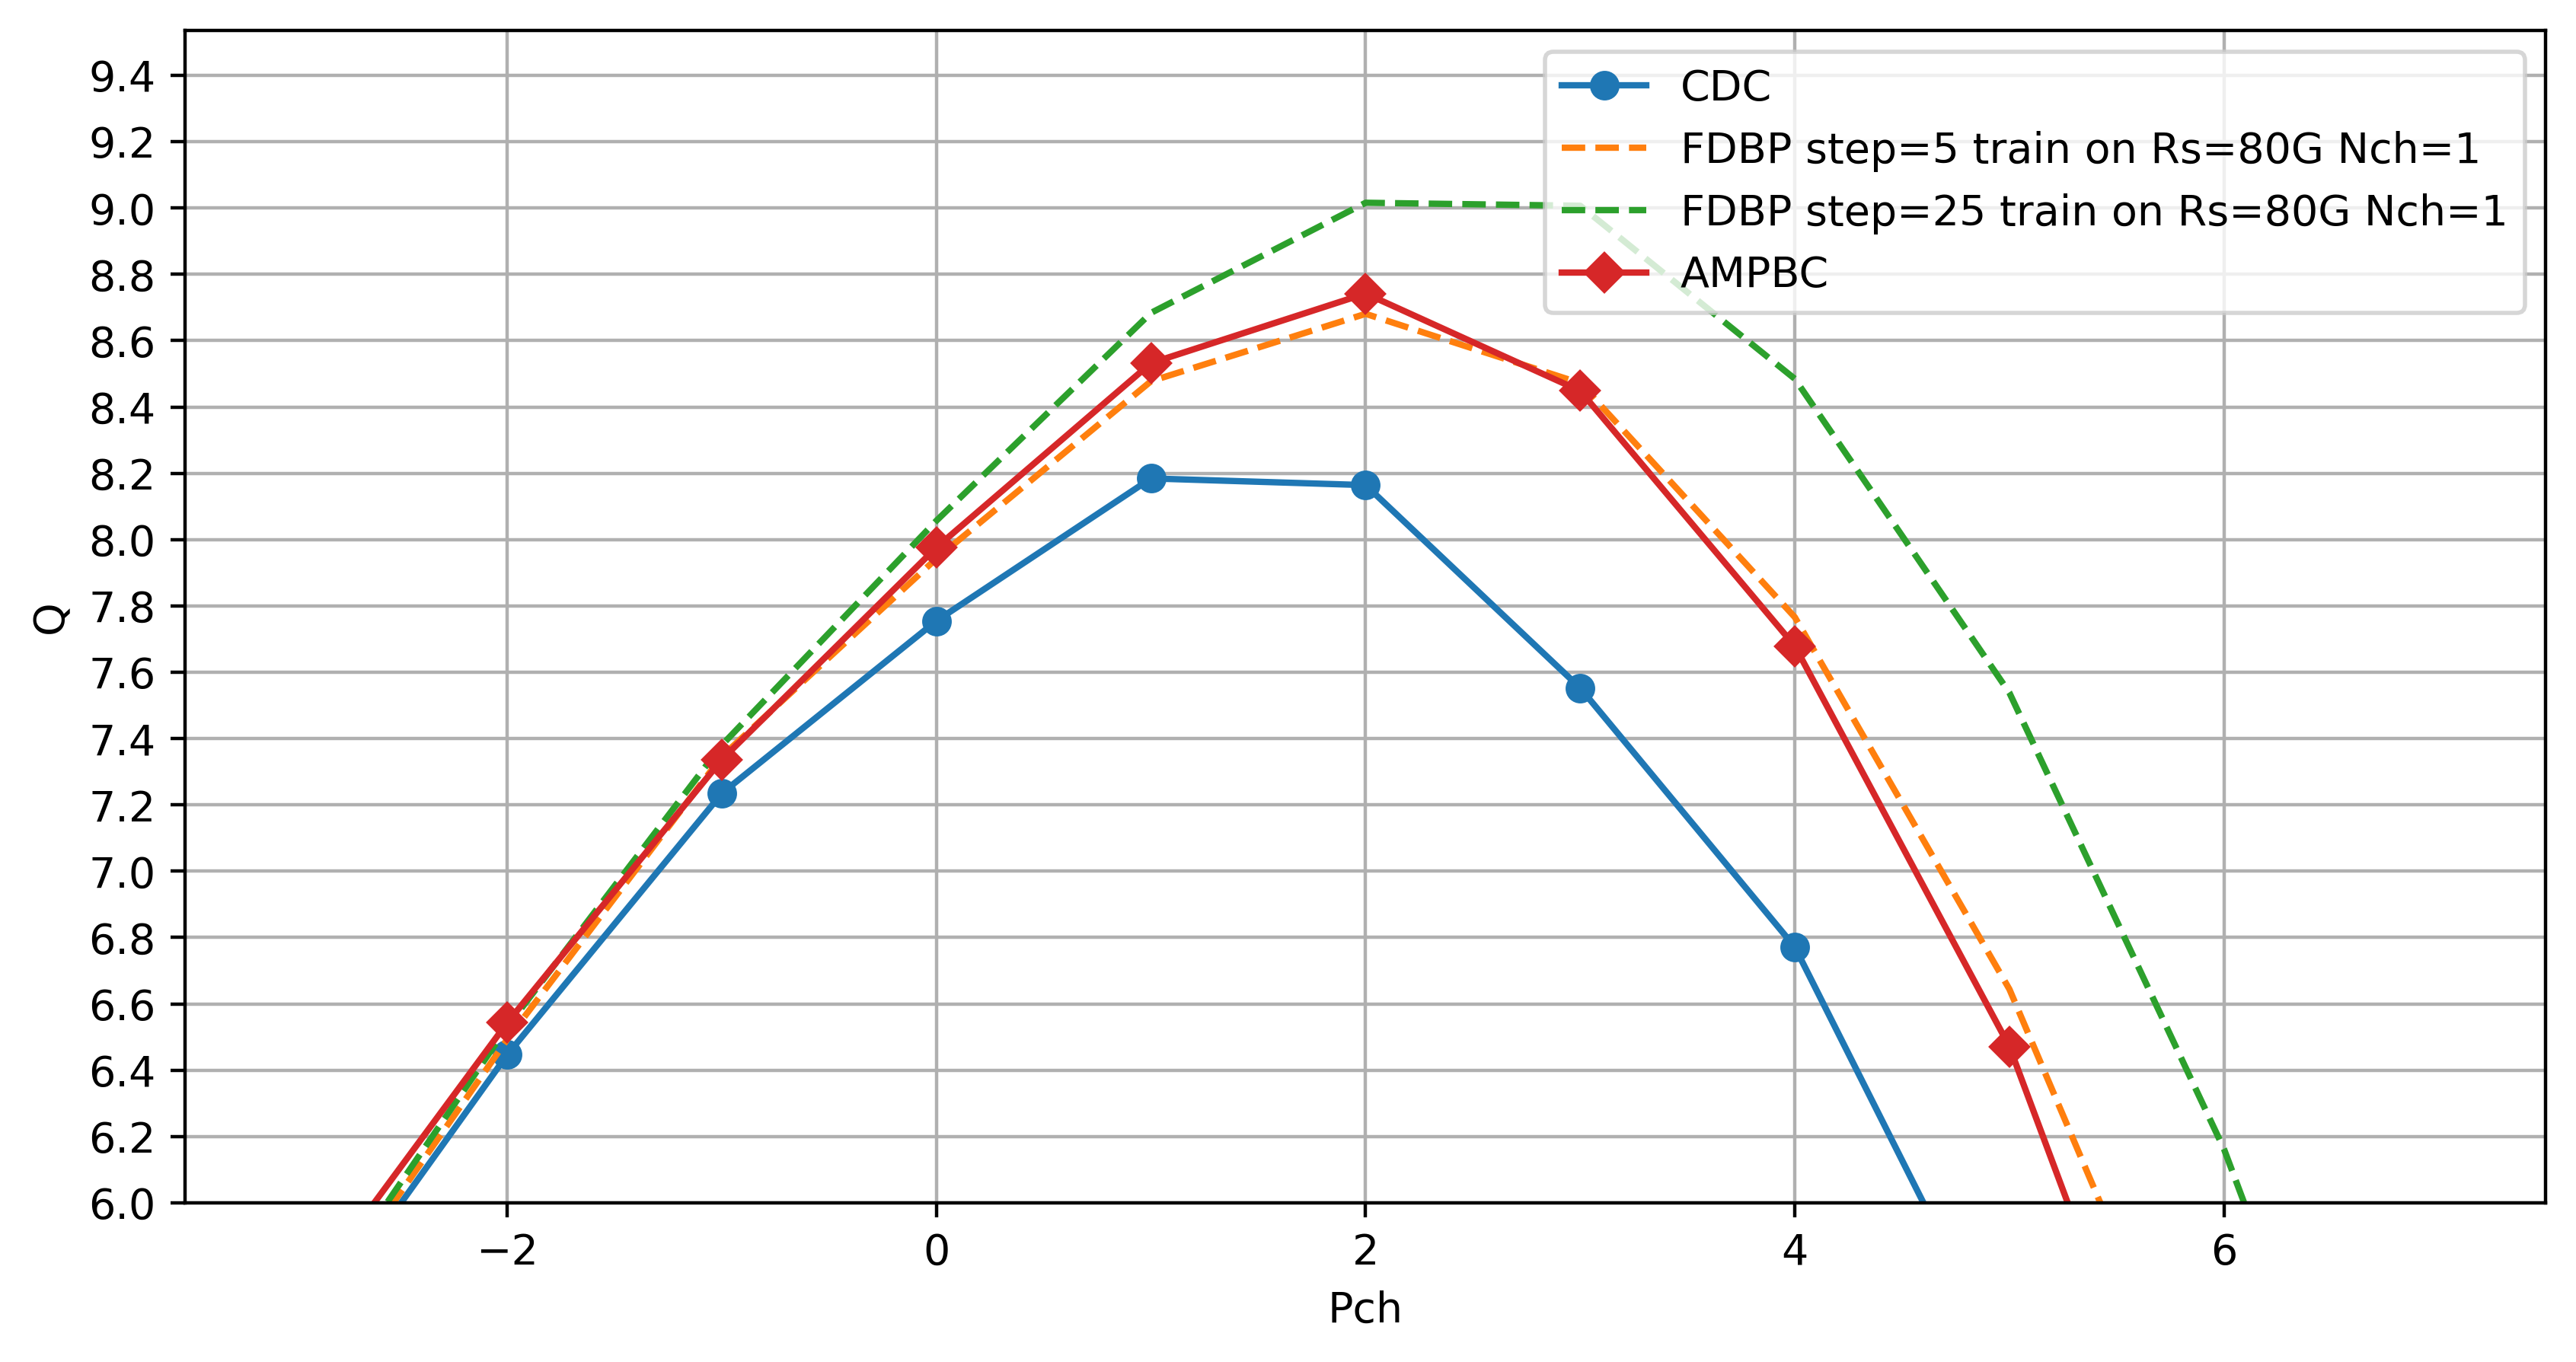

In [5]:
import matplotlib.pyplot as plt  
import numpy as np

plt.figure(figsize=(10,5), dpi=400)

ymax = 0
for key in Qps.keys():
    Qp = Qps[key]
    ymax = max(ymax, Qp['Value'].max())
    if 'FDBP' in key:
        # continue 
        plt.plot(Qp['Pch'], Qp['Value'], '--', label=key)
    elif 'CDC' in key:
        plt.plot(Qp['Pch'], Qp['Value'], '-o', label=key)
    elif 'AMPBC' in key:
        plt.plot(Qp['Pch'], Qp['Value'], '-D', label=key)
    else:
        continue
        # plt.plot(Qp['Pch'], Qp['Value'], '-*', label=key)

plt.ylim(6, ymax+0.4)
plt.yticks(np.arange(6, ymax+0.4, 0.2))
plt.xlabel('Pch')
plt.ylabel('Q')
plt.grid()
plt.legend()